In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pwd

'/Users/ted/Documents/GitHub/Stock Project'

In [3]:
path = '/Users/ted/Documents/GitHub/Stock Project/data.csv'
df = pd.read_csv(path)
df

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [ ]:
# Data Preprocessing and Cleaning and EDA
# Making More features from current features to help the model learn better

In [ ]:
# Plot Open vs Close Between any time period entered by the user
# Plot High vs Low Between any time period entered by the user
# Check which months over the year had highest Volume
# Study what are technical Indicators
# See Seasonal Trends in Closing Price and Find out the months for high Volitality

In [ ]:
# Convert the 'Gmt time' column to datetime type
df['Gmt time'] = pd.to_datetime(df['Gmt time'])

In [ ]:
# Plot Open vs Close Between any time period entered by the user

# Get user input for the time period
start_date = input("Enter the start date (eg. 17.12.2012 20:00:00): ")
end_date = input("Enter the end date (eg. 17.12.2012 20:00:00): ")

# Filter the DataFrame based on the user-provided time period
filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

plt.plot(filtered_df['Gmt time'], filtered_df['Open'], label='Open')
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Open vs Close')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plot High vs Low Between any time period entered by the user

# Get user input for the time period
start_date = input("Enter the start date (YYYY-MM-DD HH:MM:SS): ")
end_date = input("Enter the end date (YYYY-MM-DD HH:MM:SS): ")

# Filter the DataFrame based on the user-provided time period
filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]

# Plot High vs Low
plt.plot(filtered_df['Gmt time'], filtered_df['High'], label='High')
plt.plot(filtered_df['Gmt time'], filtered_df['Low'], label='Low')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('High vs Low')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check which months over the year had highest Volume

# Convert the "Gmt time" column to datetime format
df['Gmt time'] = pd.to_datetime(df['Gmt time'])

# Set the "Gmt time" column as the index
df.set_index('Gmt time', inplace=True)

# Resample the DataFrame by month and calculate the sum of the volume
monthly_volume = df['Volume'].resample('M').sum()

# Find the month(s) with the highest volume
highest_volume_months = monthly_volume[monthly_volume == monthly_volume.max()].index

# Print the month(s) with the highest volume
print("Months with the highest volume:")
for month in highest_volume_months:
    print(month.strftime('%B %Y'))

# Plot the monthly volume
plt.figure(figsize=(10, 6))
plt.bar(monthly_volume.index, monthly_volume)
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('Monthly Volume')
plt.show()

In [ ]:
# See Seasonal Trends in Closing Price and Find out the months for high Volitality



In [4]:
import talib
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
stock_data = pd.read_csv('data.csv', parse_dates=True)
stock_data = stock_data.iloc[-365:]

In [6]:
stock_data

,Gmt time,Volume,Open,High,Low,Close
12525,22.09.2020 00:00:00.000,27609.4200,1.627250,1.634525,1.626520,1.629195
12526,22.09.2020 04:00:00.000,34565.4797,1.629205,1.633130,1.628990,1.631415
12527,22.09.2020 08:00:00.000,44935.1289,1.631415,1.632650,1.625650,1.628735
12528,22.09.2020 12:00:00.000,65553.0283,1.628745,1.633380,1.626510,1.631710
12529,22.09.2020 16:00:00.000,28081.6001,1.631705,1.636395,1.630790,1.632335
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


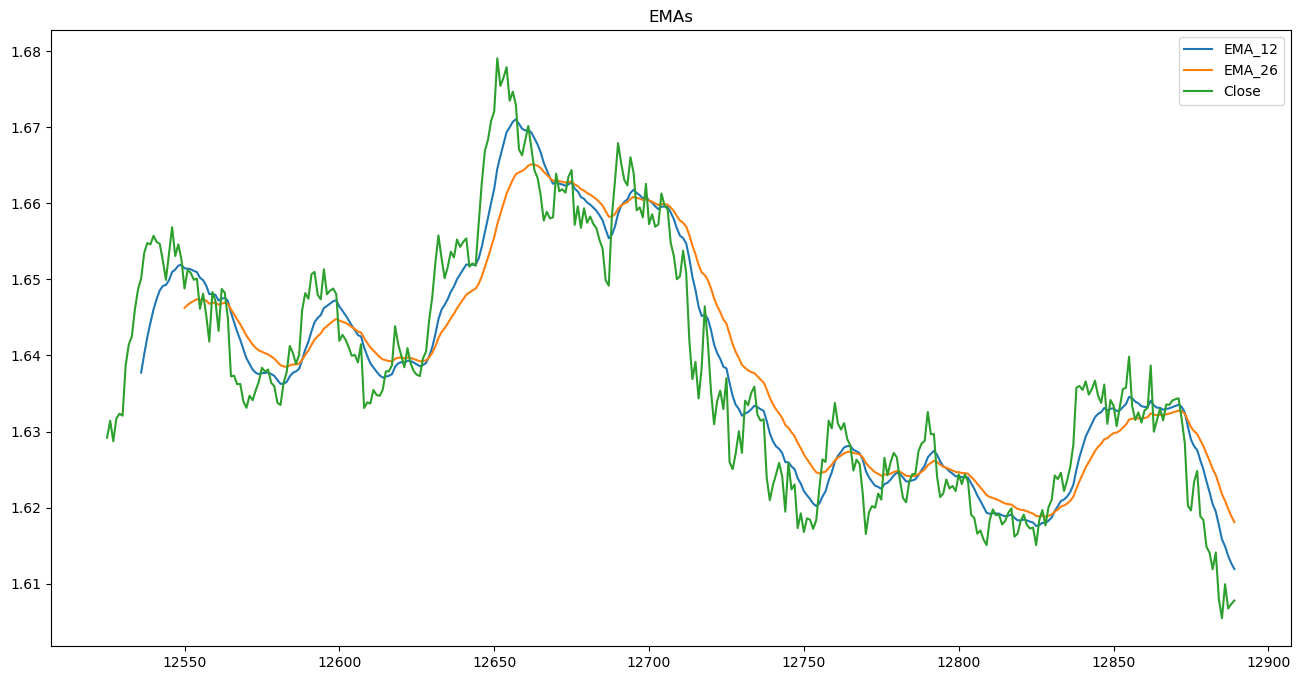

In [9]:
#Calculate and plot two EMAs
#A 12-period EMA and 26-period EMA are two moving averages used in calculating a more complex indicator called MACD (Moving Average Convergence Divergence). 
#The MACD turns two EMAs into a momentum indicator by subtracting the longer EMA from the shorter one. 
#Before learning more about MACD, you want to get familiar with its components first. 
#You decide to calculate two EMAs using the Google daily stock prices and plot them in one chart.

# Calculate 12-day EMA
stock_data['EMA_12'] = talib.EMA(stock_data['Close'], timeperiod=12)
# Calculate 26-day EMA
stock_data['EMA_26'] = talib.EMA(stock_data['Close'], timeperiod=26)

plt.figure(figsize=(16, 8))

# Plot the EMAs with price
plt.plot(stock_data['EMA_12'], label='EMA_12')
plt.plot(stock_data['EMA_26'], label='EMA_26')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()

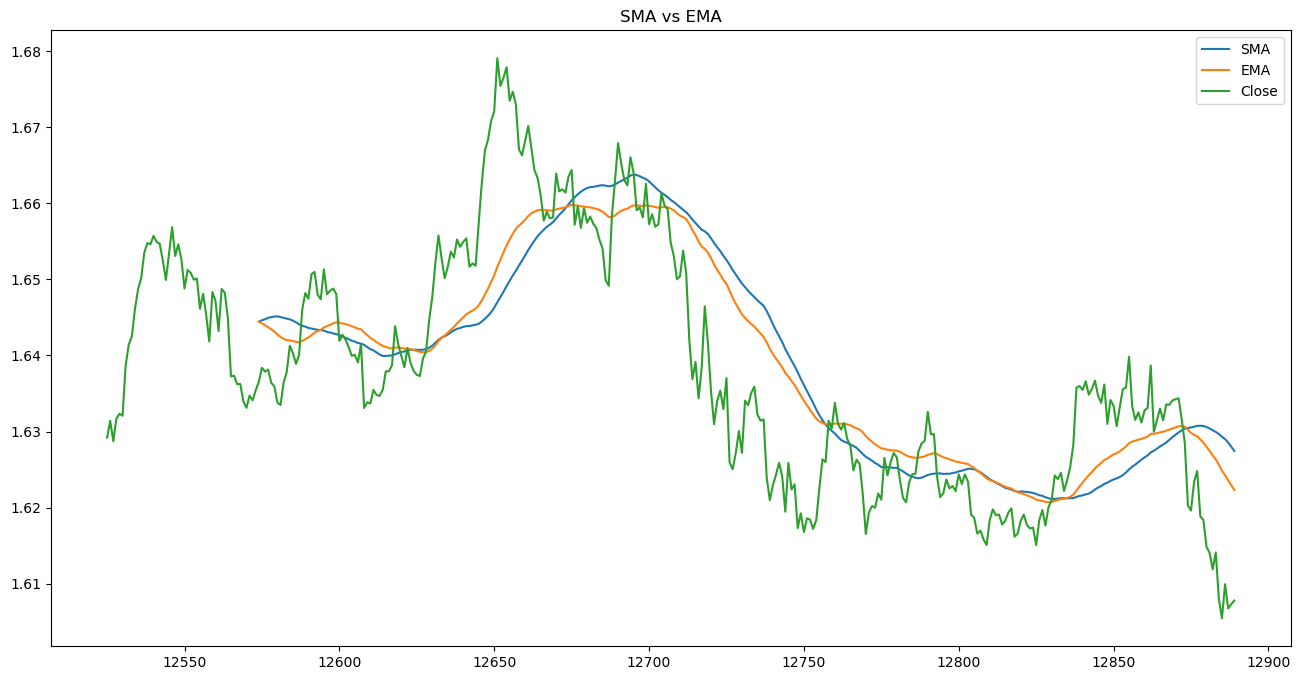

In [10]:
#SMA vs. EMA SMA and EMA are both commonly-used trend indicators. 
#SMA gives equal weight to all data points, while EMA applies more weight to recent data points. 
#You have some Google stock price data and want to decide on a moving average indicator to use. 
#You plan to calculate both the SMA and EMA with the same lookback period and plot them in one chart.



# Calculate the SMA
stock_data['SMA'] = talib.SMA(stock_data['Close'], timeperiod=50)
# Calculate the EMA
stock_data['EMA'] = talib.EMA(stock_data['Close'], timeperiod=50)

plt.figure(figsize=(16, 8))

# Plot the SMA, EMA with price
plt.plot(stock_data['SMA'], label='SMA')
plt.plot(stock_data['EMA'], label='EMA')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('SMA vs EMA')
plt.show()


In [11]:
# Calculate RSI with the default time period
stock_data['RSI_14'] = talib.RSI(stock_data['Close'])

# Calculate RSI with a time period of 21
stock_data['RSI_21'] = talib.RSI(stock_data['Close'], timeperiod = 21)

# Print the last five rows
print(stock_data.tail())

                      Gmt time    Volume      Open      High       Low  \
12885  11.12.2020 04:00:00.000  19540.22  1.607955  1.608915  1.604095   
12886  11.12.2020 08:00:00.000  48969.47  1.605465  1.611820  1.605225   
12887  11.12.2020 12:00:00.000  49848.50  1.609930  1.611365  1.606575   
12888  11.12.2020 16:00:00.000  23094.53  1.606720  1.609540  1.605880   
12889  11.12.2020 20:00:00.000   5512.42  1.607310  1.608910  1.606925   

          Close    EMA_12    EMA_26       SMA       EMA     RSI_14     RSI_21  
12885  1.605455  1.615822  1.621756  1.629307  1.624841  25.962439  31.334556  
12886  1.609935  1.614916  1.620880  1.628999  1.624257  34.488261  36.964345  
12887  1.606745  1.613659  1.619833  1.628569  1.623570  31.689908  34.829330  
12888  1.607315  1.612683  1.618906  1.628000  1.622932  32.740071  35.527985  
12889  1.607785  1.611929  1.618082  1.627436  1.622338  33.645901  36.120885  


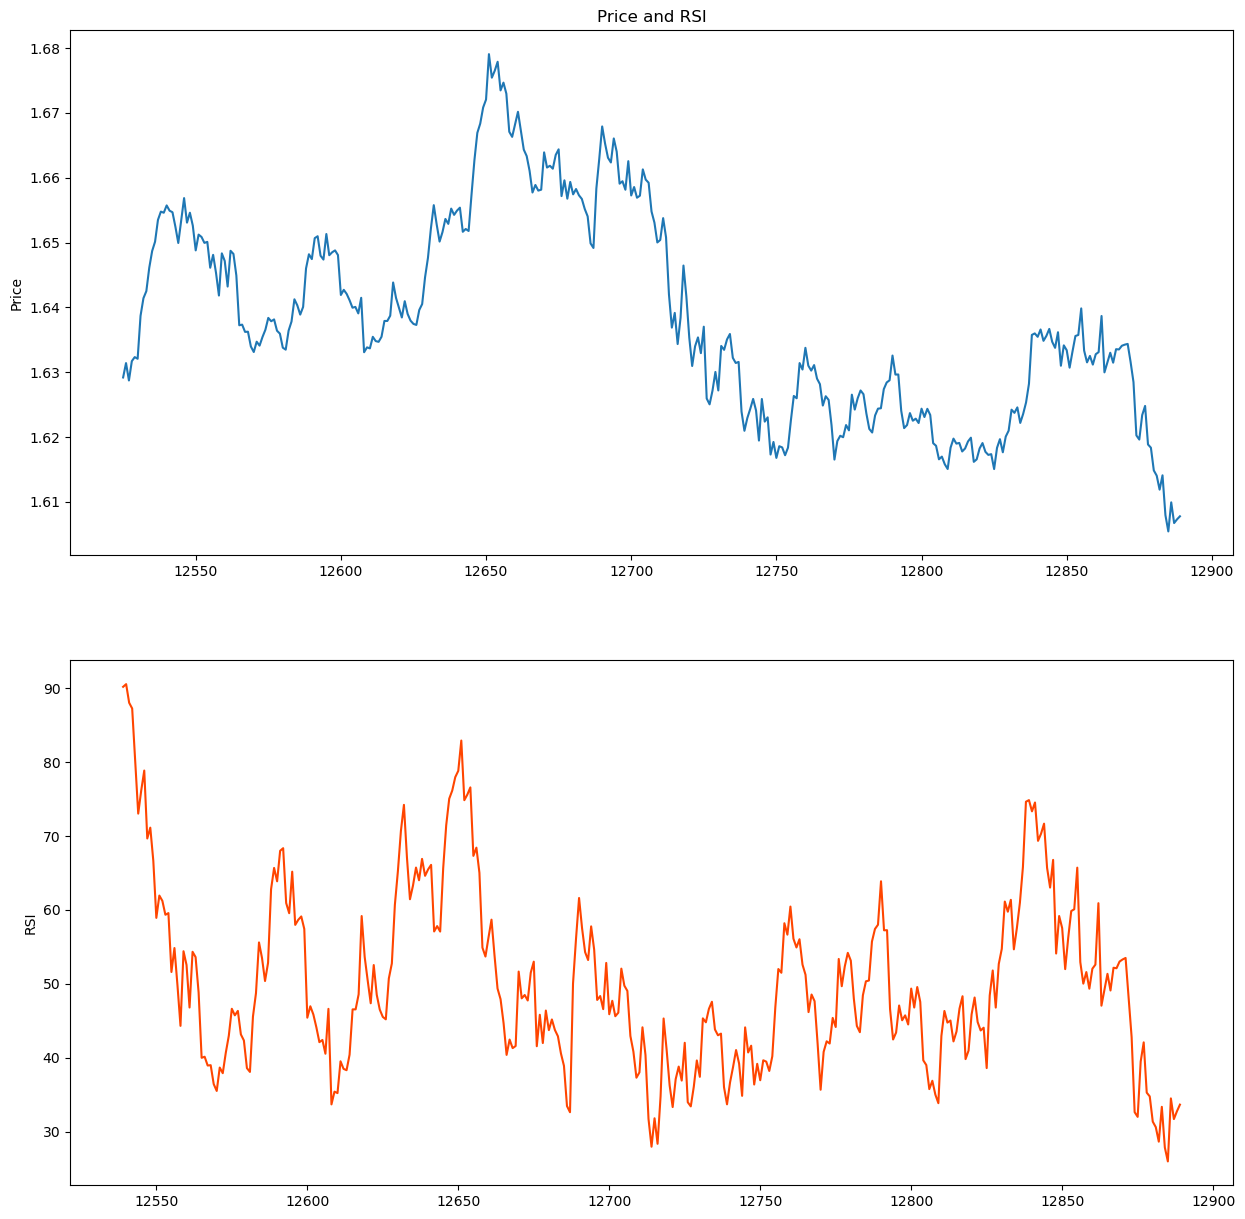

In [12]:
# Calculate RSI
stock_data['RSI'] = talib.RSI(stock_data['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(stock_data['RSI'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

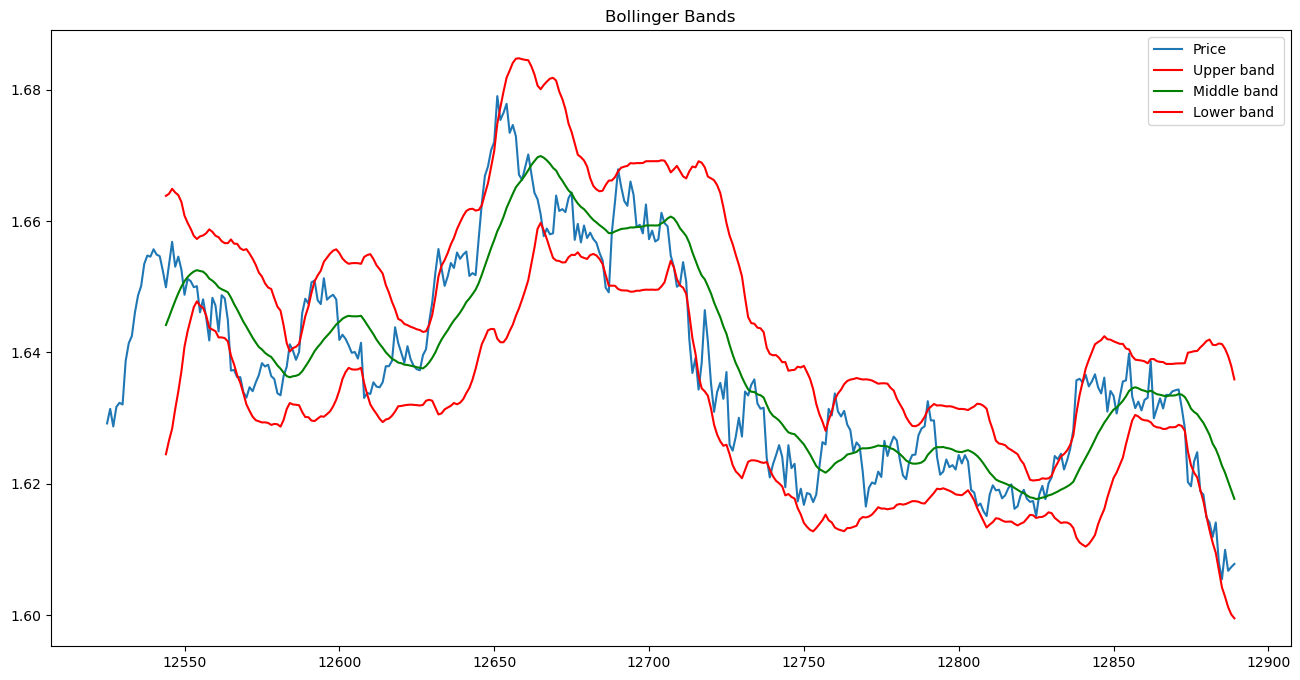

In [13]:
# Define the Bollinger Bands
upper, mid, lower = talib.BBANDS(stock_data['Close'],
                                 nbdevup=2,
                                 nbdevdn=2,
                                 timeperiod=20)

plt.figure(figsize=(16, 8))

# Plot the Bollinger Bands 
plt.plot(stock_data['Close'], label='Price')
plt.plot(upper, color='Red' , label='Upper band')
plt.plot(mid, color='Green', label='Middle band')
plt.plot(lower, color='Red', label='Lower band')

# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend()
plt.show()